Import libraries and load data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [3]:
from google.colab import files
upload = files.upload()

Saving HR_Analytics.csv to HR_Analytics.csv


In [4]:
emp=pd.read_csv('HR_Analytics.csv')

In [5]:
emp.keys()

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
emp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Handling Missing values (if any)

In [7]:
emp.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [8]:
emp=emp.drop(['EmployeeCount','StandardHours'], axis=1)

In [9]:
from sklearn.preprocessing import LabelEncoder
LbEn = LabelEncoder()
emp["Attrition"] = LbEn.fit_transform(emp["Attrition"])
emp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [10]:
emp.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


Exploratory Data Analysis and Visualization

In [14]:
emp=emp.drop(['DailyRate','HourlyRate','MonthlyRate'], axis=1)

In [15]:
emp.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2


1. Plotting Age and Attrition

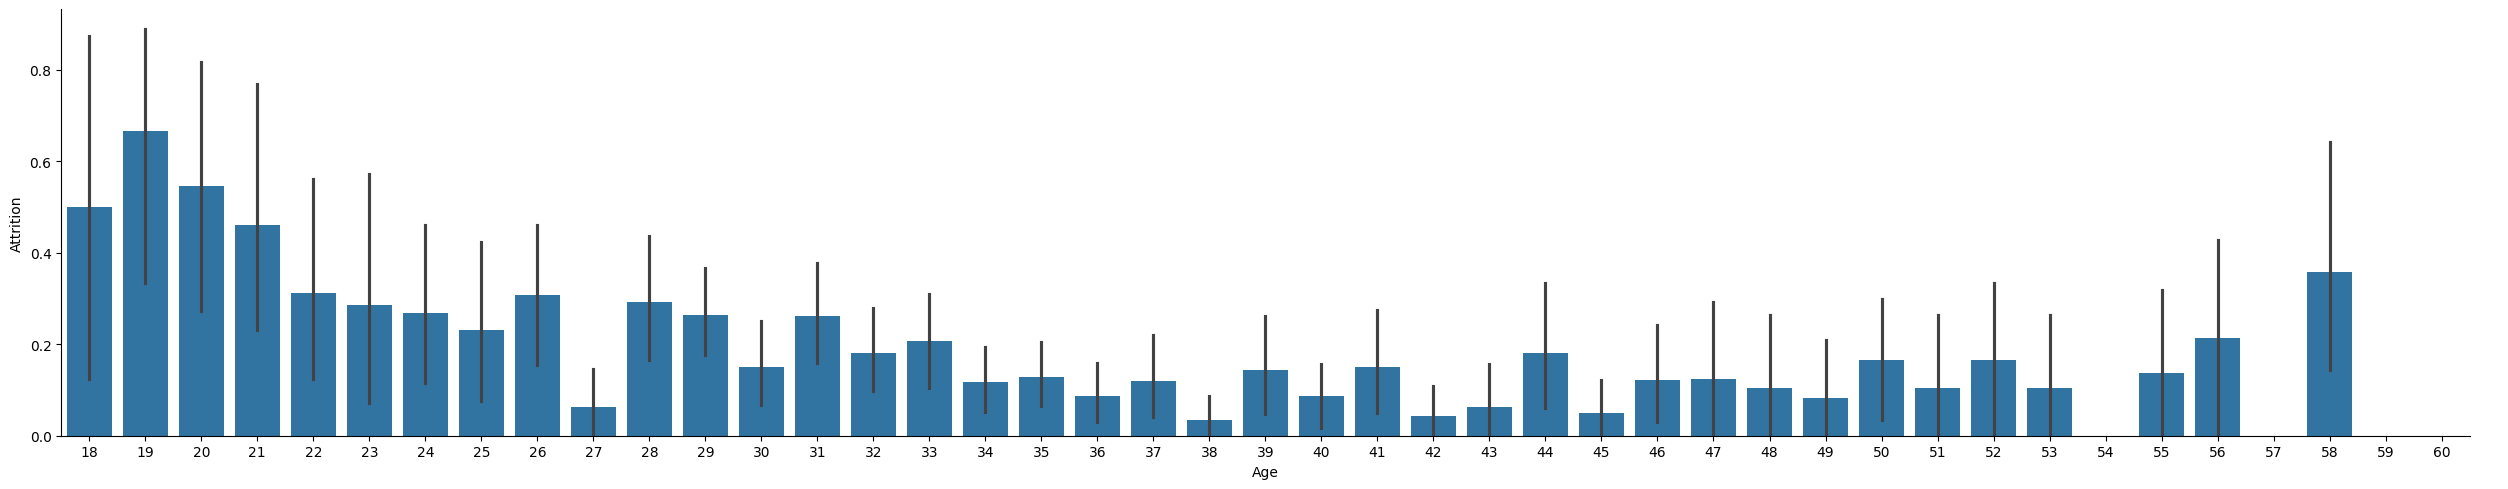

In [16]:
sns.catplot(x = "Age", y = "Attrition", aspect = 5,kind = 'bar',data = emp)
plt.show()

Younger people tend to have higher attrition rate

2.Department and Attrition

Text(0.5, 1.0, 'Attrition w.r.t Department')

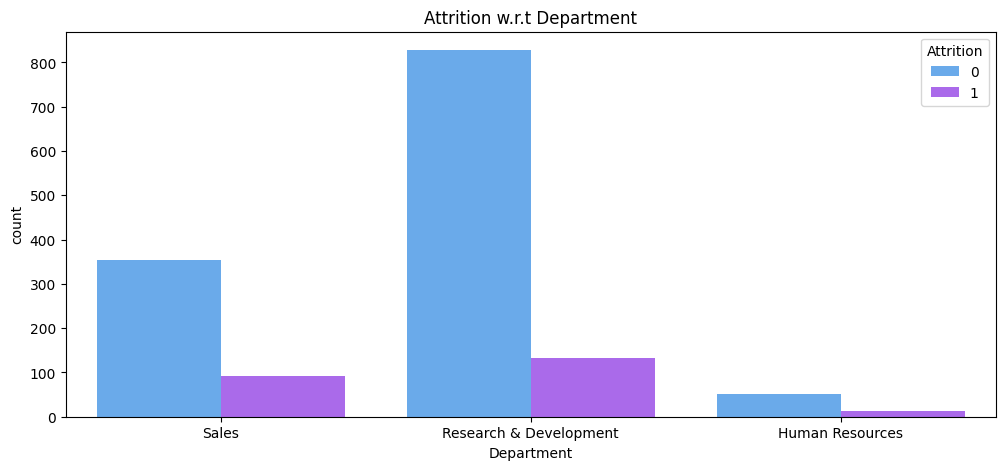

In [17]:
plt.figure(figsize=(12,5))
sns.countplot(x='Department', hue='Attrition',data=emp, palette='cool')
plt.title("Attrition w.r.t Department")

4. Plotting Job Role and Attrition

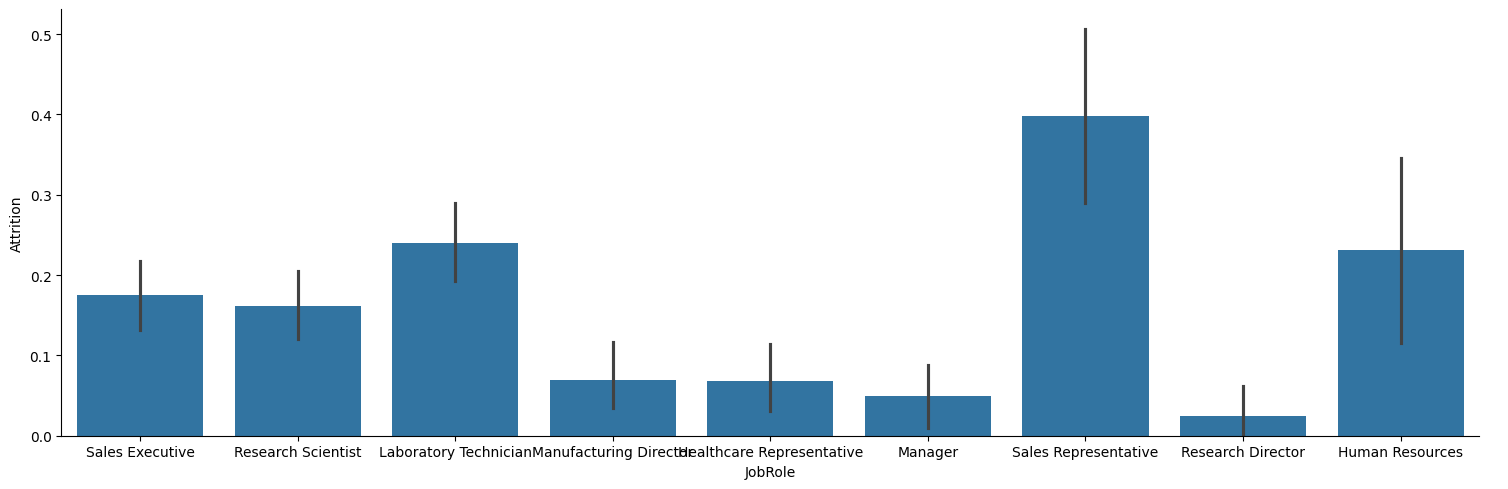

In [18]:
sns.catplot(x = "JobRole", y = "Attrition", aspect = 3,kind = 'bar',data = emp)
plt.show()


The job role with the least attrition is of a ResearchDirector and the one with maximum attrition is of a Sales Representative

5. Plotting years at Company and Attrition

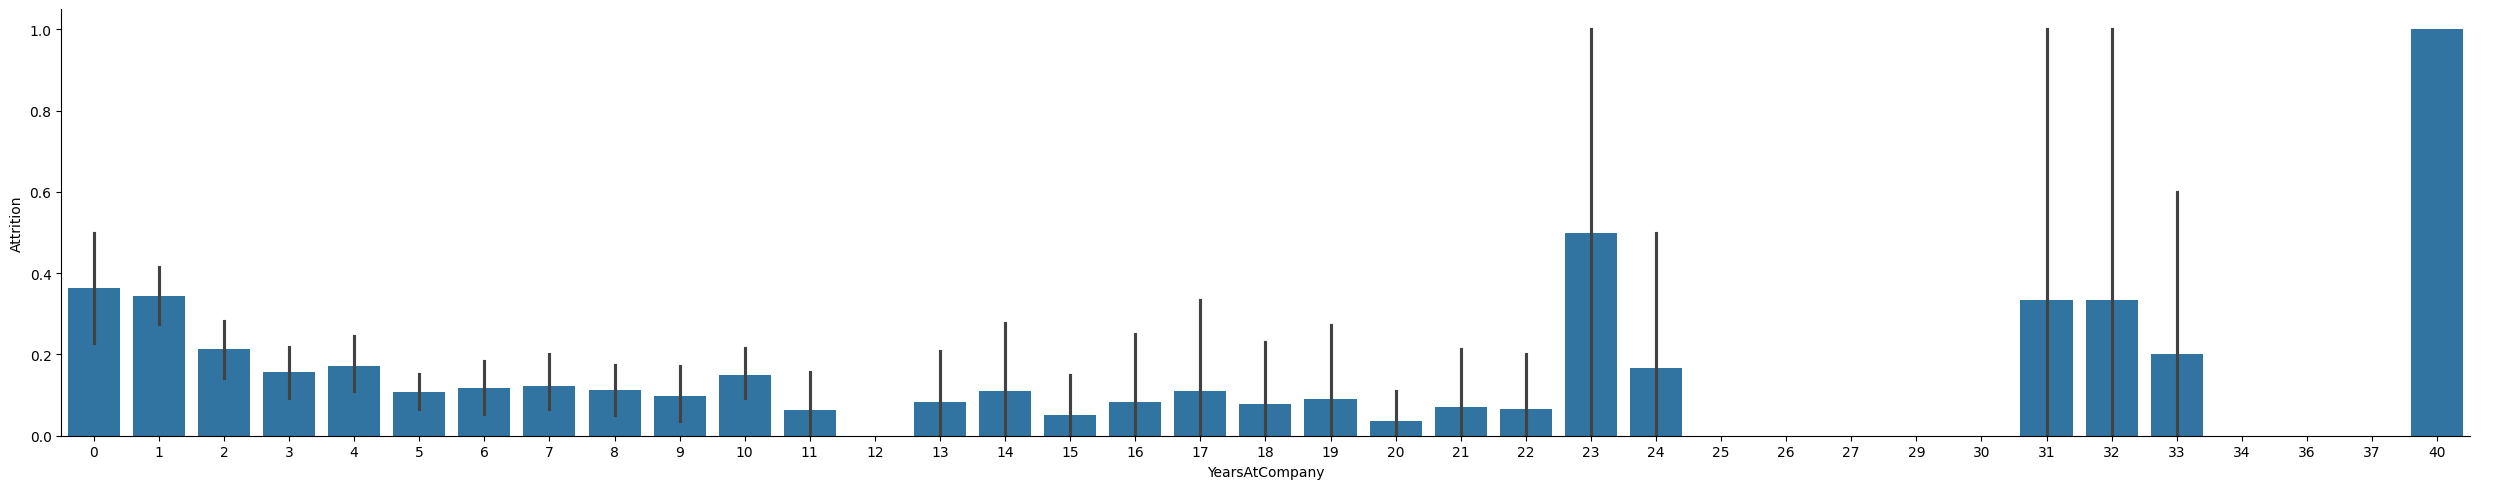

In [19]:
sns.catplot(x = "YearsAtCompany", y = "Attrition", aspect = 5,kind = 'bar',data = emp)
plt.show()

6.Plotting Environment Satisfaction and Attrition

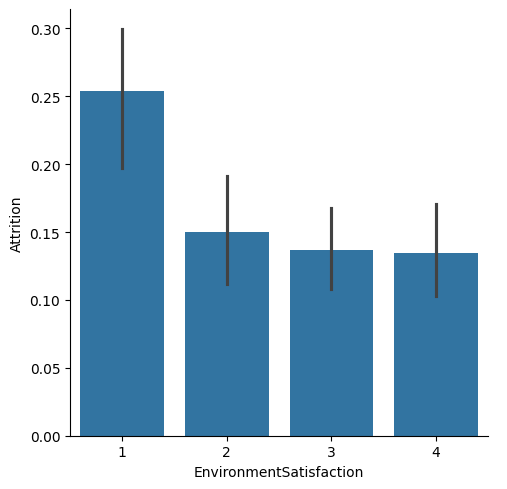

In [20]:
sns.catplot(x = "EnvironmentSatisfaction", y = "Attrition", aspect = 1,kind = 'bar',data = emp)
plt.show()

People having low environment satisfaction tend to have higher attrition rate.

7. Plotting OverTime and Attrition

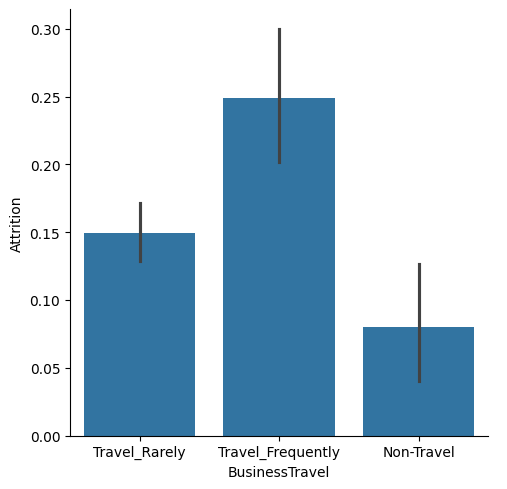

In [21]:
sns.catplot(x = "BusinessTravel", y = "Attrition", aspect = 1,kind = 'bar',data = emp)
plt.show()

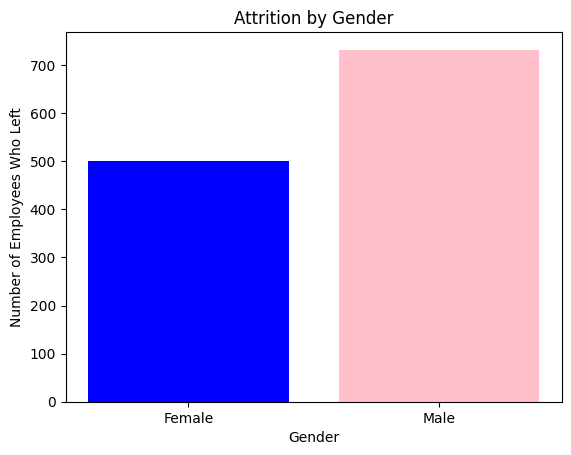

In [33]:
attrition_counts = emp[emp['Attrition'] == 0].groupby('Gender').size()
plt.bar(attrition_counts.index, attrition_counts.values, color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Number of Employees Who Left')
plt.title('Attrition by Gender')
plt.show()

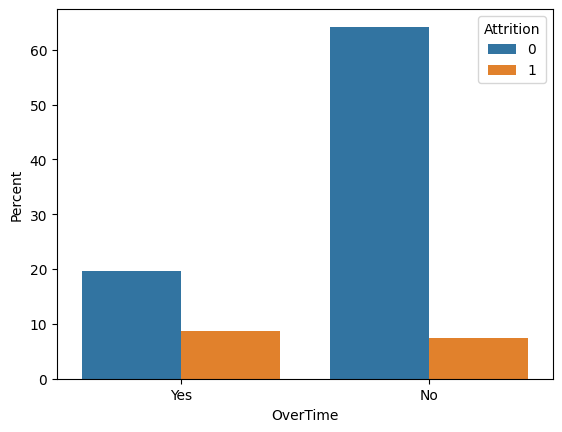

In [27]:
ax = sns.barplot(x="OverTime", y="MonthlyIncome", hue="Attrition", data=emp, estimator=lambda x: len(x) / len(emp) * 100)
ax.set(ylabel="Percent")
plt.show()

People who overtime have a higher chances of leaving the organization.

8. Plotting Monthly Income and Attrition

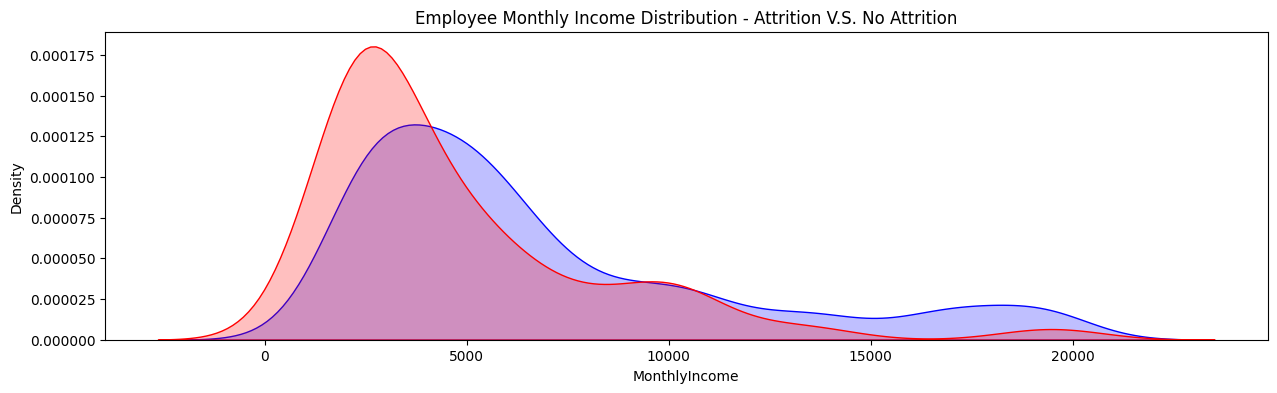

In [ ]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(emp.loc[(emp['Attrition'] == 0),'MonthlyIncome'] , color='b',fill=True, label='No Attrition')
ax=sns.kdeplot(emp.loc[(emp['Attrition'] == 1),'MonthlyIncome'] , color='r',fill=True, label='Attrition')
plt.title('Employee Monthly Income Distribution - Attrition V.S. No Attrition')
plt.show()

People with lower monthly income have a higher attrition rate.

In [40]:
att = emp[emp['Attrition'] == 0].groupby('Attrition').size()
att

,0
Attrition,
0,1233


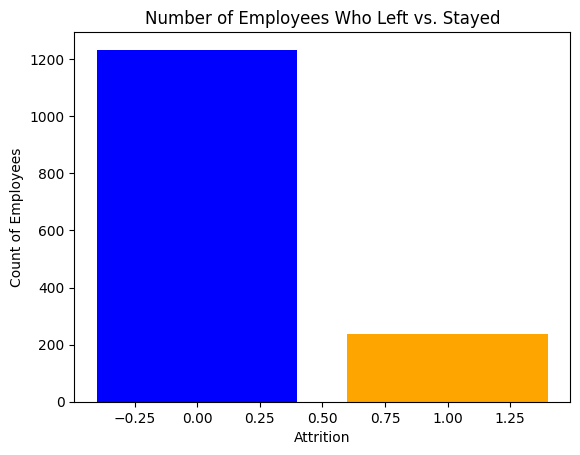

In [47]:
attrition_counts = emp['Attrition'].value_counts()

# Plot the bar chart
plt.bar(attrition_counts.index, attrition_counts.values, color=['blue', 'orange'],linewidth=5)
plt.xlabel('Attrition')
plt.ylabel('Count of Employees')
plt.title('Number of Employees Who Left vs. Stayed')
plt.show()

In [50]:
emp.shape

(1470, 30)

PREPROCESSING


Converting Categorical to numerical

In [51]:
emp=pd.get_dummies(data=emp, columns=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime'],drop_first=True)
emp.head()

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1,2,1,2,3,2,4,5993,...,False,False,False,False,False,True,False,False,True,True
1,49,0,8,1,2,3,2,2,2,5130,...,False,False,False,False,True,False,False,True,False,False
2,37,1,2,2,4,4,2,1,3,2090,...,True,False,False,False,False,False,False,False,True,True
3,33,0,3,4,5,4,3,1,3,2909,...,False,False,False,False,True,False,False,True,False,True
4,27,0,2,1,7,1,3,1,2,3468,...,True,False,False,False,False,False,False,True,False,False


In [52]:
emp.keys()

Index(['Age', 'Attrition', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
      

In [53]:
X=emp.iloc[:, emp.columns!='Attrition']
X.head()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,2,1,2,3,2,4,5993,8,...,False,False,False,False,False,True,False,False,True,True
1,49,8,1,2,3,2,2,2,5130,1,...,False,False,False,False,True,False,False,True,False,False
2,37,2,2,4,4,2,1,3,2090,6,...,True,False,False,False,False,False,False,False,True,True
3,33,3,4,5,4,3,1,3,2909,1,...,False,False,False,False,True,False,False,True,False,True
4,27,2,1,7,1,3,1,2,3468,9,...,True,False,False,False,False,False,False,True,False,False


In [54]:
y=emp.Attrition

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape

((1176, 42), (294, 42))

Recursive Feature Elimination(RFE)

In [110]:
from sklearn.feature_selection import RFE
rfe=RFE(estimator=RandomForestClassifier(),n_features_to_select=5)
rfe.fit(X,y)

RFE(estimator=RandomForestClassifier(), n_features_to_select=5)

In [111]:

selected_features = X_train.columns[rfe.support_]

print("Selected Features:", list(selected_features))


Selected Features: ['Age', 'DistanceFromHome', 'EmployeeNumber', 'MonthlyIncome', 'TotalWorkingYears']


In [112]:
features=X.columns[rfe.get_support()]

In [113]:
features

Index(['Age', 'DistanceFromHome', 'EmployeeNumber', 'MonthlyIncome',
       'TotalWorkingYears'],
      dtype='object')

In [114]:

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


rfe.fit(X_train_selected, y_train)

y_pred = rfe.predict(X_test_selected)


In [115]:
X_train_selected

,Age,DistanceFromHome,EmployeeNumber,MonthlyIncome,TotalWorkingYears
259,31,29,355,3479,6
1285,46,26,1801,7991,6
229,29,18,315,2389,4
557,35,2,771,5093,16
592,47,2,820,16752,26
...,...,...,...,...,...
1283,28,1,1799,2044,5
336,29,8,454,2119,7
401,56,6,532,13212,36
1192,49,16,1674,2587,17


XGBoost Classifier

In [122]:
import xgboost as xgb
from sklearn.metrics import accuracy_score


X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


xgb_model = xgb.XGBClassifier()


xgb_model.fit(X_train_selected, y_train)


y_pred = xgb_model.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Model Accuracy: {accuracy:.4f}")


XGBoost Model Accuracy: 0.9048


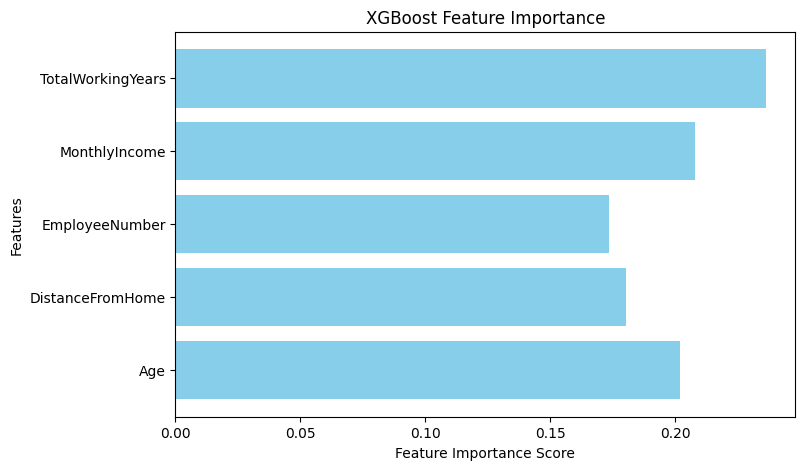

In [117]:
import matplotlib.pyplot as plt

# Get feature importance
xgb_importance = xgb_model.feature_importances_

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(selected_features, xgb_importance, color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.show()


In [120]:
from sklearn.feature_selection import RFE
import xgboost as xgb
from sklearn.metrics import accuracy_score



model = RandomForestClassifier(class_weight='balanced')

for num_features in [5, 10, 15, 20]:

    rfe = RFE(estimator=model, n_features_to_select=num_features)
    rfe.fit(X_train, y_train)


    selected_features = X_train.columns[rfe.support_]


    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    model.fit(X_train_selected, y_train)


    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {num_features} features: {accuracy:.4f}")
    xgb_importance = xgb_model.feature_importances_



Accuracy with 5 features: 0.8912
Accuracy with 10 features: 0.9014
Accuracy with 15 features: 0.8946
Accuracy with 20 features: 0.9082


In [123]:
from sklearn.feature_selection import RFE
import xgboost as xgb
from sklearn.metrics import accuracy_score


model = xgb.XGBClassifier(scale_pos_weight=len(y_train) / sum(y_train == 1))

for num_features in [5, 10, 15, 20]:

    rfe = RFE(estimator=model, n_features_to_select=num_features)
    rfe.fit(X_train, y_train)


    selected_features = X_train.columns[rfe.support_]


    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    model.fit(X_train_selected, y_train)


    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {num_features} features: {accuracy:.4f}")
    xgb_importance = xgb_model.feature_importances_

Accuracy with 5 features: 0.7075
Accuracy with 10 features: 0.8231
Accuracy with 15 features: 0.8571
Accuracy with 20 features: 0.8776
